#  RESEARCH PROJECT B
Student: Mr Eloy Ruiz Donayre  
Supervisor: Prof Dr Achim Kehrein  

Reference Paper:  
> To sleep or not to sleep: the ecology of sleep in artificial organisms  
> Alberto Acerbi, Patrick McNamara and Charles L Nunn  
> https://doi.org/10.1186/1472-6785-8-10 

## Data Analysis (40 generations)

#### Setting up modules

In [1]:
%matplotlib inline
import seaborn as sns
sns.set()

# from jupyterthemes import jtplot
# jtplot.style()

In [2]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from simulation_modules.rpb_agents import Animal, FoodPatch, SleepPatch
from simulation_modules.rpb_simmodel import SleepAnimals_sinDataColl
from simulation_modules.rpb_experiment import *

Importing C:\Users\EloyR\source\repos\research-project-b\simulation_modules\__init__.py
Importing C:\Users\EloyR\source\repos\research-project-b\simulation_modules\rpb_agents.py
Importing C:\Users\EloyR\source\repos\research-project-b\simulation_modules\rpb_simmodel.py
Importing C:\Users\EloyR\source\repos\research-project-b\simulation_modules\rpb_experiment.py


In [3]:
current_exp_id = 0
generation_number = 0
abm_models = []
generations = []
results = pd.DataFrame()
p = 0.05

#### Creating genomes of initial population
The array `genomes` represent the genomes of the first 100 individuals. Each gene in the genome has three possible values:  
`'flex' , 'eat' , 'sleep'`

In [4]:
genomes = genome_alternatives(100)
np.shape(genomes)
selected_genomes = genomes

### Executing 40 generations

In [5]:
%%time
for run_generations in range (10):
    # Creating the Agent-Based models for the current generation and running it for 7 days.
    for current_exp_id in range(100*generation_number + 0, 100*generation_number + 100):
        i = current_exp_id
        abm_models.append( SleepAnimals_sinDataColl(i, genome=selected_genomes[i-100*generation_number], 
                                        width=40, height=40, sleep_and_food_gainfactor=3) )
        for j in range(60*24*7):
            abm_models[i].step()
    
    # Capturing the data from the end of the simulation
    current_generation = []
    for k in range(100*generation_number + 0, 100*generation_number + 100):
        (x,y,z) = phases_in_genome( abm_models[k].schedule.agents[0].circadian_rythm )
        
        a = [ abm_models[k].model_id , abm_models[k].schedule.agents[0].fitness , 
             abm_models[k].schedule.agents[0].circadian_rythm, abm_models[k].schedule.agents[0].minutes_asleep,
             x, y, z ]
        current_generation.append( a )
    
#    generation_results = dataframe_generation(generation_number , current_generation)
#    results = results.append(generation_results)
    current_generation.sort(key = lambda x : x[1], reverse=True)
    generation_number += 1
    generations.append( current_generation )
    
    # Generating the new population from the fittest individuals
    selected_genomes = np.full( (100 , 24) , 'sleep')
    for l in range(20):
        for m in range(5):
            for n in range(24):
                a = current_generation[l][2][n]
                a = mutation_gene( a , p )
                selected_genomes[int(100/20)*l + m] [n] = a

Wall time: 8min 2s


## Data analysis

### Evolution of average fitness per generation

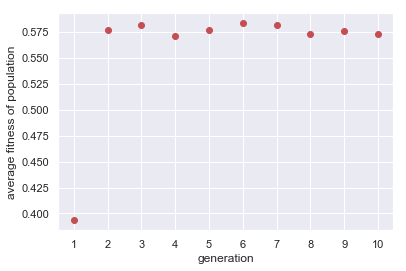

In [6]:
x = []
average_fitness = []
for j in range( len(generations) ):
    data = [ generations[j][i][1] for i in range(100) ]
    average_fitness.append( np.average(data) )
    x.append( j+1 )

_= plt.plot(x, average_fitness, "ro")
_= plt.xticks( np.arange(1,len(generations)+1,1) )
_= plt.xlabel('generation')
_= plt.ylabel('average fitness of population')

### Evolution of minutes asleep per generation

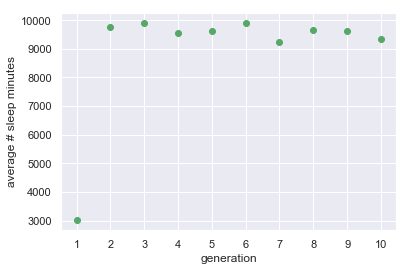

In [7]:
x = []
average_minutes_asleep = []
for j in range( len(generations) ):
    data = [ generations[j][i][3] for i in range(100) ]
    average_minutes_asleep.append( np.average(data) )
    x.append( j+1 )

_= plt.plot(x, average_minutes_asleep, "go")
_= plt.xticks( np.arange(1,len(generations)+1,1) )
_= plt.xlabel('generation')
_= plt.ylabel('average # sleep minutes')

### Evolution of the fitness of the genome sequences E-F-E, S-F-S, and S-F-E with E-F-S combined.

In [8]:
x = []
average_fitness_efe = []
average_fitness_sfs = []
average_fitness_sfe_inv = []

for j in range( len(generations) ):
    data_fitness   = [ generations[j][i][1] for i in range(100) ]
    data_efe       = [ generations[j][i][4] for i in range(100) ]
    data_sfs       = [ generations[j][i][5] for i in range(100) ]
    data_sfe_inv   = [ generations[j][i][6] for i in range(100) ]
    
    average_fitness_efe.append(     np.average(data_fitness, weights= data_efe) )
    average_fitness_sfs.append(     np.average(data_fitness, weights= data_sfs) )
    average_fitness_sfe_inv.append( np.average(data_fitness, weights= data_sfe_inv) )
    x.append( j+1 )

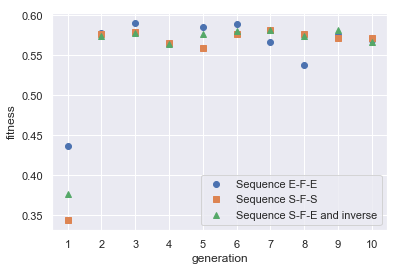

In [9]:
_= plt.plot(x, average_fitness_efe, "o", label='Sequence E-F-E')
_= plt.plot(x, average_fitness_sfs, "s", label='Sequence S-F-S')
_= plt.plot(x, average_fitness_sfe_inv, "^", label='Sequence S-F-E and inverse')
_= plt.xticks( np.arange(1,len(generations)+1,1) )
_= plt.xlabel('generation')
_= plt.ylabel('fitness')
_= plt.legend()

### Evolution of the relative proportion of the genome sequences E-F-E, S-F-S, and S-F-E with E-F-S combined.

In [10]:
x = []
appearance_efe = []
appearance_sfs = []
appearance_sfe_inv = []

for j in range( len(generations) ):
    appearance_efe_d       = np.sum([ generations[j][i][4] for i in range(100) ])
    appearance_sfs_d       = np.sum([ generations[j][i][5] for i in range(100) ])
    appearance_sfe_inv_d   = np.sum([ generations[j][i][6] for i in range(100) ])
    appearance_total_d     = appearance_efe_d + appearance_sfs_d + appearance_sfe_inv_d
    
    appearance_efe.append(     appearance_efe_d / appearance_total_d )
    appearance_sfs.append(     appearance_sfs_d / appearance_total_d ) 
    appearance_sfe_inv.append( appearance_sfe_inv_d / appearance_total_d )
    x.append( j+1 )

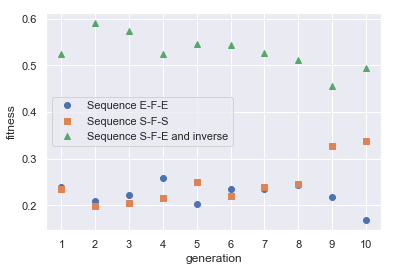

In [11]:
_= plt.plot(x, appearance_efe, "o", label='Sequence E-F-E')
_= plt.plot(x, appearance_sfs, "s", label='Sequence S-F-S')
_= plt.plot(x, appearance_sfe_inv, "^", label='Sequence S-F-E and inverse')
_= plt.xticks( np.arange(1,len(generations)+1,1) )
_= plt.xlabel('generation')
_= plt.ylabel('fitness')
_= plt.legend()